# Geostrophic Wind
All the exercises below are optional.

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/pressure/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Read longterm mean zonal (u) and meridional wind data

In [1]:
# import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
# longterm mean u and v
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/uwnd.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/vwnd.mon.ltm.nc'
file3 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/pressure/hgt.mon.ltm.nc'

with xr.open_dataset(file1) as ds1:
    print(ds1)
    u=ds1.uwnd # Unit is m/s
    #print(u)
    
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    v=ds2.vwnd # Unit is m/s
    #print(v)
    
with xr.open_dataset(file3) as ds3:
#    print(ds3)
    hgt=ds3.hgt # Unit m
#    print(hgt)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    uwnd                (time, level, lat, lon) float32 ...
    valid_yr_count      (time, level, lat, lon) float32 ...
Attributes:
    title:                          monthly mean u wind from the NCEP Reanalysis
    description:                    Data from NCEP initialized reanalysis (4x...
    platform:                       Model
    Conventions:                    COARDS
    NCO:                            20121012
    history:                        Created 20

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarr

### Calculation of geostrophic wind
Let's calculate geostrophic wind at latitude of 40N  and longitude of 85W.

In [3]:
# Geostrophic wind from geopotential height
# u_g=-1/(f*rho)*(dp/dy)
# or using geopotential height (Z)
# Z=geopotential/g=integral(g*dz)/g 
# and hydrostatic equation dp=-rho*g*dz
# u_g=-(g/f)*(dZ/dy)

In [44]:
# Let's calculate it using annual average values.
u_ann=u.mean("time").data
v_ann=v.mean("time").data
lon=ds1.lon.data
lat=ds1.lat.data

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


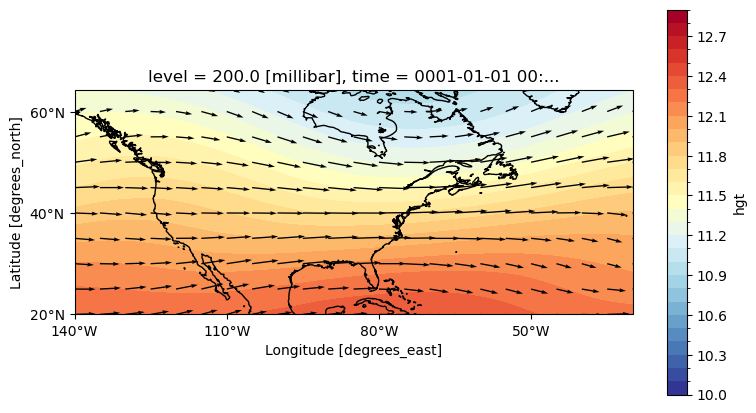

In [45]:
# Plot wind and geopotential height at 200 hPa
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r
lev1=np.arange(10,13,0.1)
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#hgt*1.e-3 is converting from m to km
(hgt.isel(level=9,time=0)*1.e-3).plot.contourf(transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1)
ax.set_extent([-140, -30, 20, 50]) # lon lat extent # lon lat extent
ax.coastlines()
q=ax.quiver(lon[::2],lat[::2],u_ann[9,::2,::2],v_ann[9,::2,::2],transform=proj,scale=500,color='k')

# Adding axis labels
xx=np.arange(-140,-30,30)
yy=np.arange(20,80,20)

ax.set_xticks(xx, crs=ccrs.PlateCarree())
ax.set_yticks(yy, crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

### Exercise 1
First, let's calculate Coriolis parameter, f, at 40.

In [46]:
# Next calculate geopotential gradient between 42.5N and 37.2N (latitude interval is 2.5 degrees.
# find latitude 40N and longitude 85W
print (np.argmin((lon-(360-85))**2), np.argmin((lat-40)**2))

110 20


In [47]:
# Check
print(lon[110],lat[20],lat[19],lat[21])

275.0 40.0 42.5 37.5


### Exercise 2
Calculate dy (the distance between latitude 42.5N and 37.2N along the same longitude).


### Exercise 3
Calculate geopotential gradient between 42.5N and 37.2N along the same longitude (dZ/dy).

### Exercise 4
Calculate x-component of geostrophic wind (u_g).

### Exercise 5
Compare with the actual wind at 40N and 85W.